## 6. VAR Modeling

This script covers the VAR modelind and Granger causality analysis to understand the drives factors for cryptocurrency price movements

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime as dt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import acf, grangercausalitytests, pacf
import utils

In [2]:
summarised_all = pd.read_csv('input_model_file_new.csv')
summarised_all=summarised_all.drop(columns='Unnamed: 0')
summarised_all.head()

,Date,avg_neg_scr,avg_neu_scr,avg_pos_scr,avg_cmp_scr,avg_retweet_cnt,avg_like_cnt,tweet_vol,uniq_tweet_vol,avg_tweet_len,...,Negative_share,Open_prices,High_prices,Low_prices,Close_prices,Volume_BTC,polarity,pct_change,direction,Close
0,2021-07-01,0.013596,0.881327,0.104758,0.248166,1719.199002,1.815065,66326,26231,122.181151,...,0.047508,2231.180,2256.155,2050.385,2074.605,1.865522e+08,0.037740,NaN,NaN,63.50
1,2021-07-02,0.010652,0.899724,0.089444,0.210551,2959.021410,1.490908,80288,26618,124.551104,...,0.041949,2074.175,2164.750,2017.015,2143.800,6.643321e+07,0.030866,0.033353,1.0,63.51
2,2021-07-03,0.010377,0.863704,0.125762,0.294886,1659.365537,1.568880,68554,26353,124.226376,...,0.037314,2145.035,2240.110,2120.090,2219.615,8.198353e+07,0.036124,0.035365,1.0,63.51
3,2021-07-04,0.011672,0.852152,0.135896,0.321410,2098.621008,2.240905,68413,26811,124.692427,...,0.045459,2219.225,2389.170,2200.875,2295.655,9.187930e+07,0.039826,0.034258,1.0,63.51
4,2021-07-05,0.011492,0.862529,0.125765,0.312211,1109.262943,1.544109,80778,38371,135.891802,...,0.043254,2294.400,2316.725,2158.565,2218.825,6.685918e+07,0.038017,-0.033468,0.0,63.51


In [3]:
summarised_all.columns

Index(['Date', 'avg_neg_scr', 'avg_neu_scr', 'avg_pos_scr', 'avg_cmp_scr',
       'avg_retweet_cnt', 'avg_like_cnt', 'tweet_vol', 'uniq_tweet_vol',
       'avg_tweet_len', 'avg_followers_cnt', 'negative', 'neutral', 'positive',
       'Bullish_Ratio', 'Negative_share', 'Open_prices', 'High_prices',
       'Low_prices', 'Close_prices', 'Volume_BTC', 'polarity', 'pct_change',
       'direction', 'Close'],
      dtype='object')

In [4]:
df_var = summarised_all[['Date', 'avg_neg_scr', 'avg_neu_scr', 'avg_pos_scr',
       'avg_cmp_scr', 'avg_retweet_cnt', 'avg_like_cnt', 'tweet_vol',
       'avg_tweet_len', 'avg_followers_cnt',  'Bullish_Ratio',
       'Negative_share', 'Open_prices', 'High_prices',
       'Low_prices', 'Close_prices', 'Volume_BTC', 'polarity', 
       'pct_change', 'Close']]
df_var['Date']=pd.to_datetime(df_var['Date'])

<ipython-input-4-065fe7219298>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_var['Date']=pd.to_datetime(df_var['Date'])


In [5]:
df_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               46 non-null     datetime64[ns]
 1   avg_neg_scr        46 non-null     float64       
 2   avg_neu_scr        46 non-null     float64       
 3   avg_pos_scr        46 non-null     float64       
 4   avg_cmp_scr        46 non-null     float64       
 5   avg_retweet_cnt    46 non-null     float64       
 6   avg_like_cnt       46 non-null     float64       
 7   tweet_vol          46 non-null     int64         
 8   avg_tweet_len      46 non-null     float64       
 9   avg_followers_cnt  46 non-null     float64       
 10  Bullish_Ratio      46 non-null     float64       
 11  Negative_share     46 non-null     float64       
 12  Open_prices        46 non-null     float64       
 13  High_prices        46 non-null     float64       
 14  Low_prices  

In [6]:
df_var = df_var.fillna(0)
df_var.head()

,Date,avg_neg_scr,avg_neu_scr,avg_pos_scr,avg_cmp_scr,avg_retweet_cnt,avg_like_cnt,tweet_vol,avg_tweet_len,avg_followers_cnt,Bullish_Ratio,Negative_share,Open_prices,High_prices,Low_prices,Close_prices,Volume_BTC,polarity,pct_change,Close
0,2021-07-01,0.013596,0.881327,0.104758,0.248166,1719.199002,1.815065,66326,122.181151,2210.552513,9.737861,0.047508,2231.180,2256.155,2050.385,2074.605,1.865522e+08,0.037740,0.000000,63.50
1,2021-07-02,0.010652,0.899724,0.089444,0.210551,2959.021410,1.490908,80288,124.551104,1783.641466,10.127969,0.041949,2074.175,2164.750,2017.015,2143.800,6.643321e+07,0.030866,0.033353,63.51
2,2021-07-03,0.010377,0.863704,0.125762,0.294886,1659.365537,1.568880,68554,124.226376,1460.016921,14.125880,0.037314,2145.035,2240.110,2120.090,2219.615,8.198353e+07,0.036124,0.035365,63.51
3,2021-07-04,0.011672,0.852152,0.135896,0.321410,2098.621008,2.240905,68413,124.692427,1621.065996,11.947267,0.045459,2219.225,2389.170,2200.875,2295.655,9.187930e+07,0.039826,0.034258,63.51
4,2021-07-05,0.011492,0.862529,0.125765,0.312211,1109.262943,1.544109,80778,135.891802,1402.129874,13.523469,0.043254,2294.400,2316.725,2158.565,2218.825,6.685918e+07,0.038017,-0.033468,63.51


### Essential Functions for running the tests

#### Descriptive statistics

In [7]:
def descriptive_statistics(df, series):
    stats = df[series].describe()    
    print('\nDescriptive Statistics for', '\'' + series + '\'', '\n\n', stats)

In [8]:
def get_graphics(df, series, xlabel, ylabel, title, grid = True):
    plt.plot(pd.to_datetime(df.index), df[series])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(grid)
    return plt.show()

#### Stationary tests

For modeling the multivariate time series, unit root test is performed to identify non-stationary variables and take differences of the evolving variables to reduce the bias induced by these variables. If there is a bias, t-statistics tests in the model won’t be reliable. Both Augmented Dicker-Fuller (ADF) and KPSS tests are performed to check for stationarity of the series

unit root = statistical properties of series are not constant with time.

In order to be stationary, series has to be constant with time. So if a series has a unit root, it is not stationary

strict stationary = mean, variance, covariance are not function of time
trend stationary = no root unit, but has a trend. if you remove the trend, it would be strict stationary
difference stationary = series can be made strict stationary by differencing

**1.ADF Augmented Dickey Fuller Test (unit root test)**

According to the ADF test, null hypothesis is that the series has a unit root and alternate hypothesis states that the series has no unit root. 

We accept the null hypothesis when t-score is greater than the critical value which means there is a unit root and series is non stationary. Otherwise we reject the null which means the series is stationary

adf can be interpreted as a difference stationary test

In [9]:
# ADF Augmented Dickey Fuller Test
def adf_test(df, series):
    results = adfuller(df[series])
    output = pd.Series(results[0:4], index = ['t-score', 'p-value', '# of lags used', '# of observations'])
    for key, value in results[4].items():
        output['critical value (%s)' %key] = value
    # if t-score < critical value at 5%, the data is stationary
    # if t-score > critical value at 5%, the data is NOT stationary
    if output[0] < output[5]:
        print('\nADF: The data', '\'' + series + '\'', 'is STATIONARY \n\n', output)
    elif output[0] > output[5]:
        print('\nADF: The data', '\'' + series + '\'', 'is NOT STATIONARY \n\n', output)
    else:
        print('\nADF: There is something wrong with', '\'' + series + '\'','\n\n', output)

#### KPSS Kwiatkowski-Phillips-Schmidt-Shin Test (stationary test)

Here the null hypothesis is opposite and it states that the series has a stationary trend and alternate hypothesis is that the series has a unit root and is non-stationary

So, we accept null hypothesis when t-score is less than critical value (series is stationary)
We reject null when t-score is greater than the critical value (series is not stationary

kpss classifies a series as stationary on the absence of a unit root
(both strict stationary and trend stationary will be classified as stationary)

In [10]:
# KPSS Kwiatkowski-Phillips-Schmidt-Shin Test (stationary test)
def kpss_test(df, series):
    results = kpss(df[series], regression = 'ct')
    output = pd.Series(results[0:3], index = ['t-score', 'p-value', '# lags used'])              
    for key, value in results[3].items():
        output['critical value (%s)' %key] = value
    # if t-score < critical value at 5%, the data is stationary
    # if t-score > critical value at 5%, the data is NOT stationary
    if output[0] < output[4]:
        print('\nKPSS: The data', '\'' + series + '\'', 'is STATIONARY \n\n', output)
    elif output[0] > output[4]:
        print('\nKPSS: The data', '\'' + series + '\'', 'is NOT STATIONARY \n\n', output)
    else:
        print('\nKPSS: There is something wrong with', '\'' + series + '\'', '\n\n', output)

In [11]:
def series_analysis(df, series, xlabel, ylabel, title, grid = True):
    # descriptive stats
    descriptive_statistics(df, series)
    # graphics
    get_graphics(df, series, xlabel, ylabel, title, grid = True)
    # stationary tests
    adf_test(df, series)
    kpss_test(df, series)

In [12]:
###transforming variables
stationary = pd.DataFrame()

### Running test for variables

In [13]:
df_var =  df_var.drop_duplicates(subset=['Date'])

df_var=df_var[df_var['Date']>='2021-07-01'].set_index('Date')
df_var.shape

(46, 19)

In [14]:
df_var

,avg_neg_scr,avg_neu_scr,avg_pos_scr,avg_cmp_scr,avg_retweet_cnt,avg_like_cnt,tweet_vol,avg_tweet_len,avg_followers_cnt,Bullish_Ratio,Negative_share,Open_prices,High_prices,Low_prices,Close_prices,Volume_BTC,polarity,pct_change,Close
Date,,,,,,,,,,,,,,,,,,,
2021-07-01,0.013596,0.881327,0.104758,0.248166,1719.199002,1.815065,66326,122.181151,2210.552513,9.737861,0.047508,2231.180,2256.155,2050.385,2074.605,1.865522e+08,0.037740,0.000000,63.50
2021-07-02,0.010652,0.899724,0.089444,0.210551,2959.021410,1.490908,80288,124.551104,1783.641466,10.127969,0.041949,2074.175,2164.750,2017.015,2143.800,6.643321e+07,0.030866,0.033353,63.51
2021-07-03,0.010377,0.863704,0.125762,0.294886,1659.365537,1.568880,68554,124.226376,1460.016921,14.125880,0.037314,2145.035,2240.110,2120.090,2219.615,8.198353e+07,0.036124,0.035365,63.51
2021-07-04,0.011672,0.852152,0.135896,0.321410,2098.621008,2.240905,68413,124.692427,1621.065996,11.947267,0.045459,2219.225,2389.170,2200.875,2295.655,9.187930e+07,0.039826,0.034258,63.51
2021-07-05,0.011492,0.862529,0.125765,0.312211,1109.262943,1.544109,80778,135.891802,1402.129874,13.523469,0.043254,2294.400,2316.725,2158.565,2218.825,6.685918e+07,0.038017,-0.033468,63.51
2021-07-06,0.010767,0.864418,0.124667,0.306945,1385.331280,1.475759,85888,126.287130,1699.593377,10.718079,0.054804,2217.355,2350.555,2217.300,2331.655,9.264312e+07,0.036637,0.050851,61.93
2021-07-07,0.015956,0.887242,0.096689,0.216140,589.273689,3.167510,69590,130.347938,2038.971002,5.360752,0.085601,2330.595,2409.155,2265.235,2284.975,7.125894e+07,0.039278,-0.020020,62.25
2021-07-08,0.029575,0.880383,0.089840,0.120384,2406.759747,1.223334,124298,129.034522,1472.053211,1.795033,0.198257,2283.640,2290.885,2065.500,2117.700,1.582472e+08,0.051546,-0.073206,61.41
2021-07-09,0.024675,0.891219,0.083907,0.127639,1628.213216,1.264657,95021,124.833553,2058.131655,2.175116,0.156313,2117.635,2190.560,2057.770,2139.980,9.912796e+07,0.045501,0.010521,63.08


In [15]:
df_var['pct_change'] = df_var['pct_change']+1

In [16]:
df_var.columns

Index(['avg_neg_scr', 'avg_neu_scr', 'avg_pos_scr', 'avg_cmp_scr',
       'avg_retweet_cnt', 'avg_like_cnt', 'tweet_vol', 'avg_tweet_len',
       'avg_followers_cnt', 'Bullish_Ratio', 'Negative_share', 'Open_prices',
       'High_prices', 'Low_prices', 'Close_prices', 'Volume_BTC', 'polarity',
       'pct_change', 'Close'],
      dtype='object')

In [17]:
df_var_log=pd.DataFrame()

#### take log transformations of the series 


Descriptive Statistics for 'avg_neg_scr' 

 count    46.000000
mean     -3.850611
std       0.561183
min      -4.967342
25%      -4.368173
50%      -3.712107
75%      -3.507881
max      -2.722788
Name: avg_neg_scr, dtype: float64


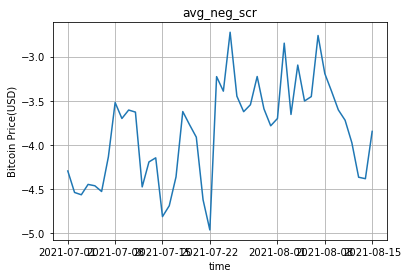


ADF: The data 'avg_neg_scr' is STATIONARY 

 t-score                 -3.244226
p-value                  0.017563
# of lags used           0.000000
# of observations       45.000000
critical value (1%)     -3.584829
critical value (5%)     -2.928299
critical value (10%)    -2.602344
dtype: float64

KPSS: The data 'avg_neg_scr' is STATIONARY 

 t-score                   0.115306
p-value                   0.100000
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_neu_scr' 

 count    46.000000
mean     -0.142334
std       0.023115
min      -0.196522
25%      -0.159494
50%      -0.133869
75%      -0.126282
max      -0.098616
Name: avg_neu_scr, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


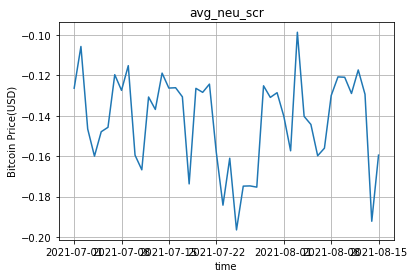


ADF: The data 'avg_neu_scr' is STATIONARY 

 t-score                 -4.430116
p-value                  0.000262
# of lags used           0.000000
# of observations       45.000000
critical value (1%)     -3.584829
critical value (5%)     -2.928299
critical value (10%)    -2.602344
dtype: float64

KPSS: The data 'avg_neu_scr' is STATIONARY 

 t-score                   0.099682
p-value                   0.100000
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_pos_scr' 

 count    46.000000
mean     -2.246897
std       0.186444
min      -2.688277
25%      -2.380881
50%      -2.227480
75%      -2.075552
max      -1.817770
Name: avg_pos_scr, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


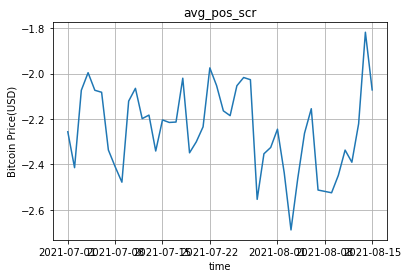

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'avg_pos_scr' is STATIONARY 

 t-score                 -3.810032
p-value                  0.002806
# of lags used           0.000000
# of observations       45.000000
critical value (1%)     -3.584829
critical value (5%)     -2.928299
critical value (10%)    -2.602344
dtype: float64

KPSS: The data 'avg_pos_scr' is STATIONARY 

 t-score                   0.083589
p-value                   0.100000
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_cmp_scr' 

 count    46.000000
mean     -1.643342
std       0.543945
min      -4.146231
25%      -1.771193
50%      -1.517109
75%      -1.302759
max      -0.931755
Name: avg_cmp_scr, dtype: float64


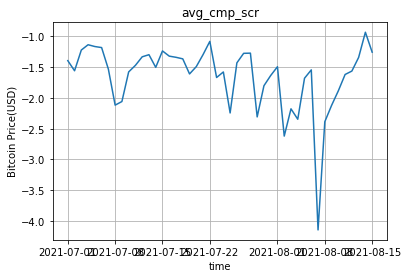


ADF: The data 'avg_cmp_scr' is STATIONARY 

 t-score                 -4.371883
p-value                  0.000333
# of lags used           0.000000
# of observations       45.000000
critical value (1%)     -3.584829
critical value (5%)     -2.928299
critical value (10%)    -2.602344
dtype: float64

KPSS: The data 'avg_cmp_scr' is STATIONARY 

 t-score                   0.090801
p-value                   0.100000
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_retweet_cnt' 

 count    46.000000
mean      7.514674
std       0.470999
min       6.378891
25%       7.288406
50%       7.476403
75%       7.862821
max       8.548211
Name: avg_retweet_cnt, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


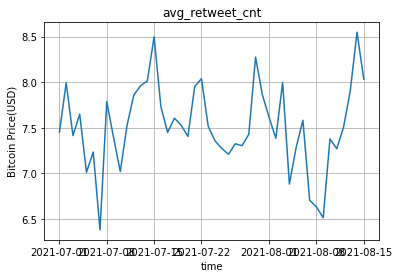


ADF: The data 'avg_retweet_cnt' is STATIONARY 

 t-score                 -4.095890
p-value                  0.000984
# of lags used           0.000000
# of observations       45.000000
critical value (1%)     -3.584829
critical value (5%)     -2.928299
critical value (10%)    -2.602344
dtype: float64

KPSS: The data 'avg_retweet_cnt' is STATIONARY 

 t-score                   0.099896
p-value                   0.100000
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_like_cnt' 

 count    46.000000
mean      0.416579
std       0.272291
min      -0.094246
25%       0.244910
50%       0.384012
75%       0.478049
max       1.570290
Name: avg_like_cnt, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


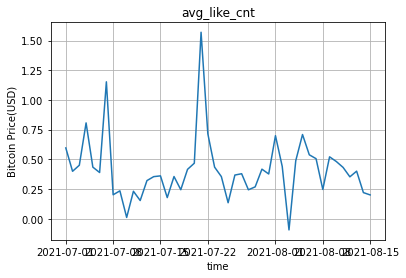


ADF: The data 'avg_like_cnt' is STATIONARY 

 t-score                 -5.344436
p-value                  0.000004
# of lags used           0.000000
# of observations       45.000000
critical value (1%)     -3.584829
critical value (5%)     -2.928299
critical value (10%)    -2.602344
dtype: float64

KPSS: The data 'avg_like_cnt' is STATIONARY 

 t-score                   0.08707
p-value                   0.10000
# lags used              10.00000
critical value (10%)      0.11900
critical value (5%)       0.14600
critical value (2.5%)     0.17600
critical value (1%)       0.21600
dtype: float64

Descriptive Statistics for 'tweet_vol' 

 count    46.000000
mean     11.607133
std       0.284957
min      11.102337
25%      11.406406
50%      11.611842
75%      11.813344
max      12.218545
Name: tweet_vol, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


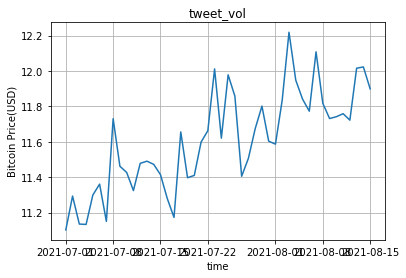

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)



ADF: The data 'tweet_vol' is NOT STATIONARY 

 t-score                 -0.757324
p-value                  0.831338
# of lags used          10.000000
# of observations       35.000000
critical value (1%)     -3.632743
critical value (5%)     -2.948510
critical value (10%)    -2.613017
dtype: float64

KPSS: The data 'tweet_vol' is NOT STATIONARY 

 t-score                   0.152999
p-value                   0.044167
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_tweet_len' 

 count    46.000000
mean      4.840559
std       0.044587
min       4.723856
25%       4.820390
50%       4.827660
75%       4.861429
max       4.931584
Name: avg_tweet_len, dtype: float64


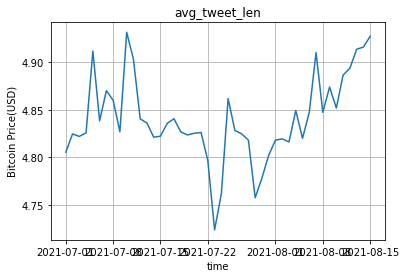

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)



ADF: The data 'avg_tweet_len' is STATIONARY 

 t-score                 -2.992379
p-value                  0.035612
# of lags used           0.000000
# of observations       45.000000
critical value (1%)     -3.584829
critical value (5%)     -2.928299
critical value (10%)    -2.602344
dtype: float64

KPSS: The data 'avg_tweet_len' is STATIONARY 

 t-score                   0.132094
p-value                   0.075753
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'avg_followers_cnt' 

 count    46.000000
mean      7.341283
std       0.247233
min       6.784245
25%       7.245161
50%       7.357311
75%       7.435457
max       8.153599
Name: avg_followers_cnt, dtype: float64


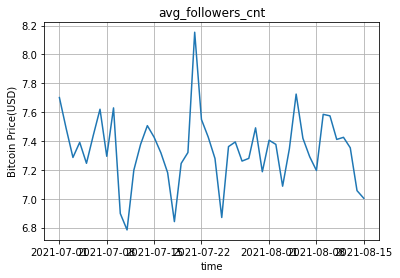

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'avg_followers_cnt' is STATIONARY 

 t-score                 -5.266925
p-value                  0.000006
# of lags used           3.000000
# of observations       42.000000
critical value (1%)     -3.596636
critical value (5%)     -2.933297
critical value (10%)    -2.604991
dtype: float64

KPSS: The data 'avg_followers_cnt' is STATIONARY 

 t-score                   0.091434
p-value                   0.100000
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Bullish_Ratio' 

 count    46.000000
mean      1.607359
std       0.719488
min       0.147343
25%       1.086314
50%       1.593898
75%       2.303865
max       3.016561
Name: Bullish_Ratio, dtype: float64


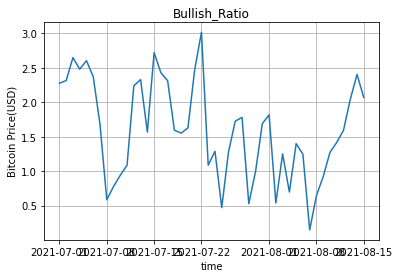

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'Bullish_Ratio' is STATIONARY 

 t-score                 -3.450492
p-value                  0.009353
# of lags used           0.000000
# of observations       45.000000
critical value (1%)     -3.584829
critical value (5%)     -2.928299
critical value (10%)    -2.602344
dtype: float64

KPSS: The data 'Bullish_Ratio' is STATIONARY 

 t-score                   0.105147
p-value                   0.100000
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Negative_share' 

 count    46.000000
mean     -2.365257
std       0.601995
min      -3.539484
25%      -2.894241
50%      -2.347942
75%      -1.866030
max      -1.278741
Name: Negative_share, dtype: float64


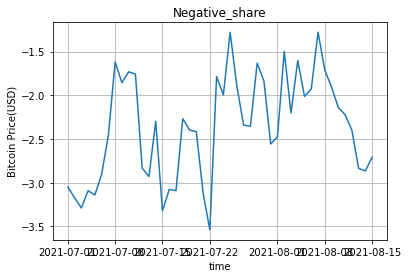

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'Negative_share' is STATIONARY 

 t-score                 -3.458867
p-value                  0.009109
# of lags used           0.000000
# of observations       45.000000
critical value (1%)     -3.584829
critical value (5%)     -2.928299
critical value (10%)    -2.602344
dtype: float64

KPSS: The data 'Negative_share' is STATIONARY 

 t-score                   0.112279
p-value                   0.100000
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Open_prices' 

 count    46.000000
mean      7.760110
std       0.175979
min       7.480784
25%       7.640671
50%       7.715527
75%       7.853209
max       8.105301
Name: Open_prices, dtype: float64


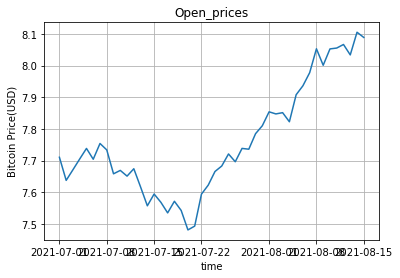

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)



ADF: The data 'Open_prices' is NOT STATIONARY 

 t-score                  0.253084
p-value                  0.975087
# of lags used           0.000000
# of observations       45.000000
critical value (1%)     -3.584829
critical value (5%)     -2.928299
critical value (10%)    -2.602344
dtype: float64

KPSS: The data 'Open_prices' is STATIONARY 

 t-score                   0.142980
p-value                   0.055592
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'High_prices' 

 count    46.000000
mean      7.799473
std       0.177628
min       7.512284
25%       7.680465
50%       7.755166
75%       7.920998
max       8.111703
Name: High_prices, dtype: float64


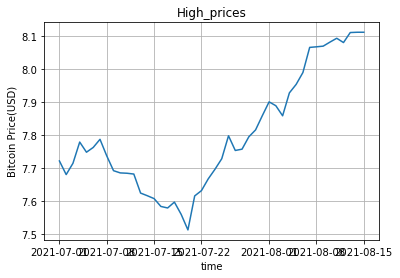

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)



ADF: The data 'High_prices' is NOT STATIONARY 

 t-score                  0.400044
p-value                  0.981497
# of lags used           0.000000
# of observations       45.000000
critical value (1%)     -3.584829
critical value (5%)     -2.928299
critical value (10%)    -2.602344
dtype: float64

KPSS: The data 'High_prices' is STATIONARY 

 t-score                   0.141173
p-value                   0.058938
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Low_prices' 

 count    46.000000
mean      7.726786
std       0.176844
min       7.448951
25%       7.605016
50%       7.678395
75%       7.828689
max       8.073118
Name: Low_prices, dtype: float64


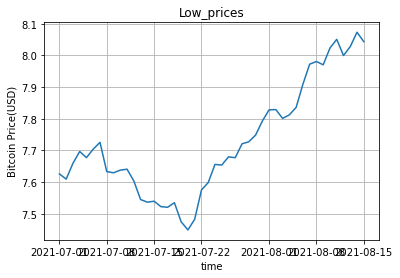

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)



ADF: The data 'Low_prices' is NOT STATIONARY 

 t-score                 -0.066063
p-value                  0.952716
# of lags used           1.000000
# of observations       44.000000
critical value (1%)     -3.588573
critical value (5%)     -2.929886
critical value (10%)    -2.603185
dtype: float64

KPSS: The data 'Low_prices' is STATIONARY 

 t-score                   0.141826
p-value                   0.057730
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Close_prices' 

 count    46.000000
mean      7.768488
std       0.182714
min       7.480485
25%       7.640571
50%       7.727653
75%       7.894007
max       8.105080
Name: Close_prices, dtype: float64


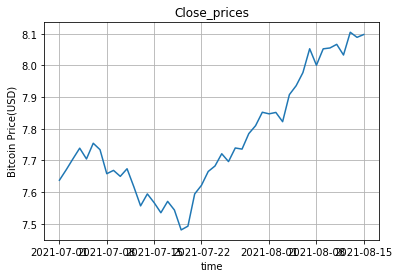

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)



ADF: The data 'Close_prices' is NOT STATIONARY 

 t-score                  0.170101
p-value                  0.970534
# of lags used           0.000000
# of observations       45.000000
critical value (1%)     -3.584829
critical value (5%)     -2.928299
critical value (10%)    -2.602344
dtype: float64

KPSS: The data 'Close_prices' is STATIONARY 

 t-score                   0.140649
p-value                   0.059910
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Volume_BTC' 

 count    46.000000
mean     18.582153
std       0.545095
min      17.616217
25%      18.237505
50%      18.412642
75%      19.051743
max      19.696168
Name: Volume_BTC, dtype: float64


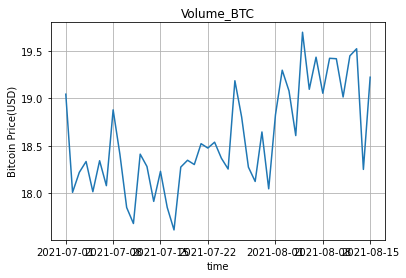

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)



ADF: The data 'Volume_BTC' is NOT STATIONARY 

 t-score                 -1.303800
p-value                  0.627432
# of lags used           2.000000
# of observations       43.000000
critical value (1%)     -3.592504
critical value (5%)     -2.931550
critical value (10%)    -2.604066
dtype: float64

KPSS: The data 'Volume_BTC' is STATIONARY 

 t-score                   0.128967
p-value                   0.081542
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'polarity' 

 count    46.000000
mean     -3.048754
std       0.259008
min      -3.510107
25%      -3.263481
50%      -3.042303
75%      -2.849267
max      -2.453954
Name: polarity, dtype: float64


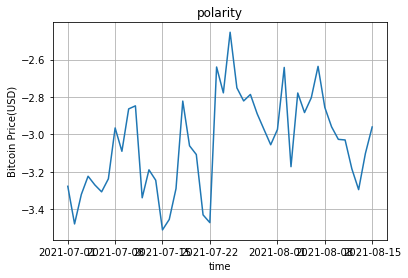

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)



ADF: The data 'polarity' is STATIONARY 

 t-score                 -3.569302
p-value                  0.006376
# of lags used           0.000000
# of observations       45.000000
critical value (1%)     -3.584829
critical value (5%)     -2.928299
critical value (10%)    -2.602344
dtype: float64

KPSS: The data 'polarity' is STATIONARY 

 t-score                   0.120795
p-value                   0.096676
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'pct_change' 

 count    46.000000
mean      0.010009
std       0.041258
min      -0.076024
25%      -0.023647
50%       0.011653
75%       0.038517
max       0.101831
Name: pct_change, dtype: float64


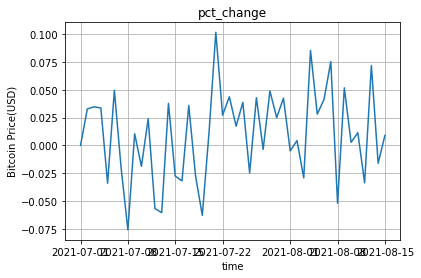

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'pct_change' is STATIONARY 

 t-score                -7.266801e+00
p-value                 1.627014e-10
# of lags used          0.000000e+00
# of observations       4.500000e+01
critical value (1%)    -3.584829e+00
critical value (5%)    -2.928299e+00
critical value (10%)   -2.602344e+00
dtype: float64

KPSS: The data 'pct_change' is STATIONARY 

 t-score                   0.093298
p-value                   0.100000
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Close' 

 count    46.000000
mean      4.126189
std       0.024106
min       4.056816
25%       4.111774
50%       4.128504
75%       4.144879
max       4.162626
Name: Close, dtype: float64


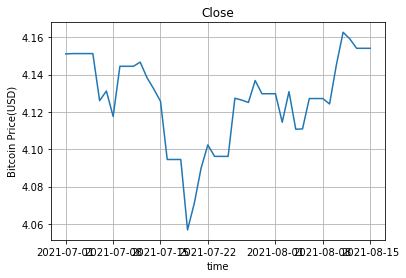


ADF: The data 'Close' is NOT STATIONARY 

 t-score                 -1.874016
p-value                  0.344382
# of lags used           0.000000
# of observations       45.000000
critical value (1%)     -3.584829
critical value (5%)     -2.928299
critical value (10%)    -2.602344
dtype: float64

KPSS: The data 'Close' is STATIONARY 

 t-score                   0.142556
p-value                   0.056377
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


,avg_neg_scr,avg_neu_scr,avg_pos_scr,avg_cmp_scr,avg_retweet_cnt,avg_like_cnt,tweet_vol,avg_tweet_len,avg_followers_cnt,Bullish_Ratio,Negative_share,Open_prices,High_prices,Low_prices,Close_prices,Volume_BTC,polarity,pct_change,Close
Date,,,,,,,,,,,,,,,,,,,
2021-07-01,-4.297987,-0.126326,-2.256099,-1.393658,7.449614,0.596121,11.102337,4.805505,7.700998,2.276021,-3.046862,7.710286,7.721417,7.625783,7.637526,19.044221,-3.277043,0.000000,4.151040
2021-07-02,-4.542031,-0.105668,-2.414137,-1.558030,7.992614,0.399385,11.293375,4.824716,7.486412,2.315301,-3.171301,7.637319,7.680060,7.609374,7.670335,18.011708,-3.478084,0.032809,4.151197
2021-07-03,-4.568207,-0.146526,-2.073366,-1.221166,7.414191,0.450362,11.135377,4.822106,7.286203,2.648009,-3.288396,7.670911,7.714280,7.659214,7.705089,18.222029,-3.320786,0.034754,4.151197
2021-07-04,-4.450603,-0.159990,-1.995867,-1.135037,7.649036,0.806880,11.133318,4.825850,7.390839,2.480503,-3.090940,7.704913,7.778701,7.696610,7.738773,18.335986,-3.223235,0.033684,4.151197
2021-07-05,-4.466082,-0.147887,-2.073337,-1.164075,7.011451,0.434447,11.299460,4.911859,7.245748,2.604427,-3.140657,7.738227,7.747910,7.677199,7.704733,18.018099,-3.269710,-0.034040,4.151197


In [18]:
col_list=[ 
       'avg_neg_scr', 'avg_neu_scr', 'avg_pos_scr', 'avg_cmp_scr',
       'avg_retweet_cnt', 'avg_like_cnt', 'tweet_vol', 'avg_tweet_len',
       'avg_followers_cnt', 'Bullish_Ratio', 'Negative_share', 'Open_prices',
       'High_prices', 'Low_prices', 'Close_prices', 'Volume_BTC', 'polarity',
       'pct_change', 'Close']
for metric_name in df_var[col_list]:
    metric = df_var[metric_name]
    
    df_var_log[metric_name] = df_var[metric_name].apply(np.log).dropna()
# run tests to see if stationary
    series_analysis(df_var_log,metric_name, xlabel = 'time', ylabel = 'Bitcoin Price(USD)', title = metric_name)

df_var_log.head()


Descriptive Statistics for 'tweet_vol' 

 count    45.000000
mean      0.017700
std       0.226663
min      -0.452344
25%      -0.120438
50%      -0.002059
75%       0.166142
max       0.580061
Name: tweet_vol, dtype: float64


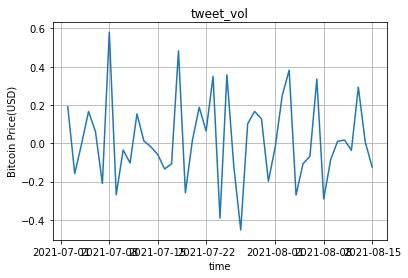


ADF: The data 'tweet_vol' is STATIONARY 

 t-score                 -4.378672
p-value                  0.000324
# of lags used           9.000000
# of observations       35.000000
critical value (1%)     -3.632743
critical value (5%)     -2.948510
critical value (10%)    -2.613017
dtype: float64

KPSS: The data 'tweet_vol' is STATIONARY 

 t-score                   0.143943
p-value                   0.053809
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Low_prices' 

 count    45.000000
mean      0.009282
std       0.037180
min      -0.092306
25%      -0.010339
50%       0.008364
75%       0.033731
max       0.092292
Name: Low_prices, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


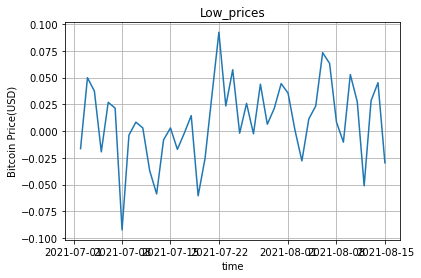


ADF: The data 'Low_prices' is STATIONARY 

 t-score                 -5.372217
p-value                  0.000004
# of lags used           0.000000
# of observations       44.000000
critical value (1%)     -3.588573
critical value (5%)     -2.929886
critical value (10%)    -2.603185
dtype: float64

KPSS: The data 'Low_prices' is STATIONARY 

 t-score                   0.09642
p-value                   0.10000
# lags used              10.00000
critical value (10%)      0.11900
critical value (5%)       0.14600
critical value (2.5%)     0.17600
critical value (1%)       0.21600
dtype: float64

Descriptive Statistics for 'High_prices' 

 count    45.000000
mean      0.008673
std       0.036724
min      -0.057672
25%      -0.011740
50%       0.003917
75%       0.031890
max       0.103095
Name: High_prices, dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


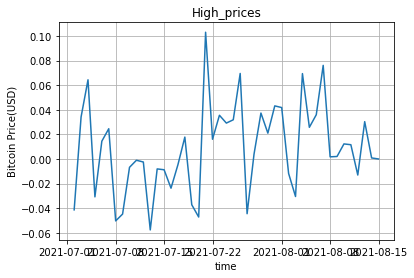

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'High_prices' is STATIONARY 

 t-score                -6.278802e+00
p-value                 3.841533e-08
# of lags used          0.000000e+00
# of observations       4.400000e+01
critical value (1%)    -3.588573e+00
critical value (5%)    -2.929886e+00
critical value (10%)   -2.603185e+00
dtype: float64

KPSS: The data 'High_prices' is STATIONARY 

 t-score                   0.102386
p-value                   0.100000
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Open_prices' 

 count    45.000000
mean      0.008413
std       0.043378
min      -0.075471
25%      -0.026131
50%       0.012046
75%       0.038099
max       0.100998
Name: Open_prices, dtype: float64


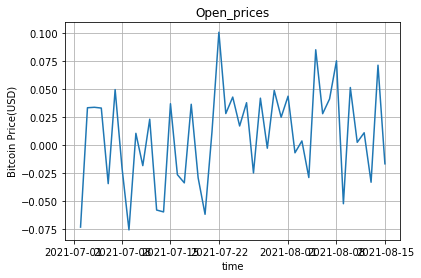

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'Open_prices' is STATIONARY 

 t-score                -7.536425e+00
p-value                 3.468695e-11
# of lags used          0.000000e+00
# of observations       4.400000e+01
critical value (1%)    -3.588573e+00
critical value (5%)    -2.929886e+00
critical value (10%)   -2.603185e+00
dtype: float64

KPSS: The data 'Open_prices' is STATIONARY 

 t-score                   0.10119
p-value                   0.10000
# lags used              10.00000
critical value (10%)      0.11900
critical value (5%)       0.14600
critical value (2.5%)     0.17600
critical value (1%)       0.21600
dtype: float64

Descriptive Statistics for 'Close_prices' 

 count    45.000000
mean      0.010231
std       0.041696
min      -0.076024
25%      -0.024788
50%       0.011869
75%       0.038757
max       0.101831
Name: Close_prices, dtype: float64


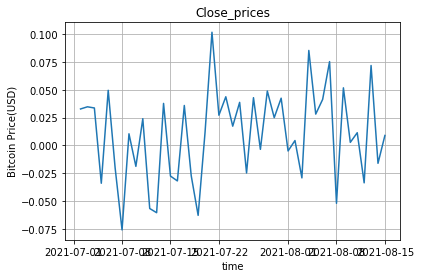

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'Close_prices' is STATIONARY 

 t-score                -7.180750e+00
p-value                 2.653858e-10
# of lags used          0.000000e+00
# of observations       4.400000e+01
critical value (1%)    -3.588573e+00
critical value (5%)    -2.929886e+00
critical value (10%)   -2.603185e+00
dtype: float64

KPSS: The data 'Close_prices' is STATIONARY 

 t-score                   0.095576
p-value                   0.100000
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Close' 

 count    45.000000
mean      0.000066
std       0.013465
min      -0.037695
25%      -0.005012
50%       0.000000
75%       0.002217
max       0.031119
Name: Close, dtype: float64


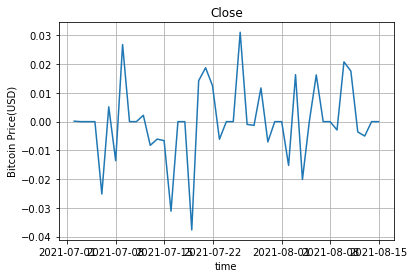

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)



ADF: The data 'Close' is STATIONARY 

 t-score                -7.207815e+00
p-value                 2.275855e-10
# of lags used          0.000000e+00
# of observations       4.400000e+01
critical value (1%)    -3.588573e+00
critical value (5%)    -2.929886e+00
critical value (10%)   -2.603185e+00
dtype: float64

KPSS: The data 'Close' is STATIONARY 

 t-score                   0.099003
p-value                   0.100000
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64

Descriptive Statistics for 'Volume_BTC' 

 count    45.000000
mean      0.003972
std       0.522187
min      -1.269684
25%      -0.379503
50%      -0.045978
75%       0.337872
max       1.087349
Name: Volume_BTC, dtype: float64


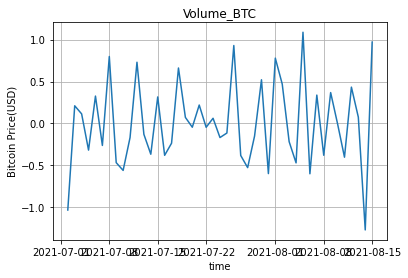


ADF: The data 'Volume_BTC' is STATIONARY 

 t-score                -8.477994e+00
p-value                 1.418154e-13
# of lags used          1.000000e+00
# of observations       4.300000e+01
critical value (1%)    -3.592504e+00
critical value (5%)    -2.931550e+00
critical value (10%)   -2.604066e+00
dtype: float64

KPSS: The data 'Volume_BTC' is STATIONARY 

 t-score                   0.143431
p-value                   0.054758
# lags used              10.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64


C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


,tweet_vol,Low_prices,High_prices,Open_prices,Close_prices,Close,Volume_BTC
Date,,,,,,,
2021-07-02,0.191038,-0.016409,-0.041357,-0.072967,0.032809,0.000157,-1.032514
2021-07-03,-0.157998,0.049840,0.034220,0.033592,0.034754,0.000000,0.210321
2021-07-04,-0.002059,0.037396,0.064421,0.034002,0.033684,0.000000,0.113957
2021-07-05,0.166142,-0.019411,-0.030791,0.033313,-0.034040,0.000000,-0.317887
2021-07-06,0.061339,0.026847,0.014497,-0.034156,0.049601,-0.025193,0.326166


In [19]:
# ['price'] = log & diff
col_list=[ 
       'tweet_vol','Low_prices' ,'High_prices','Open_prices',
       'Close_prices', 'Close','Volume_BTC']
for metric_name in df_var_log[col_list]:
    metric = df_var_log[metric_name]
    
    stationary[metric_name] = df_var_log[metric_name].diff().dropna()
# run tests to see if stationary
    series_analysis(stationary,metric_name, xlabel = 'time', ylabel = 'Bitcoin Price(USD)', title = metric_name)

stationary.head()

In [20]:
df_var_log1 = df_var_log[1:]
df_var_log1.shape

(45, 19)

In [21]:
# ['price'] = log & diff
col_list=['avg_neg_scr', 'avg_neu_scr', 'avg_pos_scr', 'avg_cmp_scr',
       'avg_retweet_cnt', 'avg_like_cnt', 
        'Bullish_Ratio', 'Negative_share', 'polarity',
       'pct_change','avg_tweet_len','avg_followers_cnt', ]

for metric_name in df_var_log1[col_list]:
    metric = df_var_log1[metric_name]
    
    stationary[metric_name] = df_var_log1[metric_name]
# run tests to see if stationary
    #series_analysis(stationary,metric_name, xlabel = 'time', ylabel = 'Bitcoin Price(USD)', title = metric_name)

stationary.head()

,tweet_vol,Low_prices,High_prices,Open_prices,Close_prices,Close,Volume_BTC,avg_neg_scr,avg_neu_scr,avg_pos_scr,avg_cmp_scr,avg_retweet_cnt,avg_like_cnt,Bullish_Ratio,Negative_share,polarity,pct_change,avg_tweet_len,avg_followers_cnt
Date,,,,,,,,,,,,,,,,,,,
2021-07-02,0.191038,-0.016409,-0.041357,-0.072967,0.032809,0.000157,-1.032514,-4.542031,-0.105668,-2.414137,-1.558030,7.992614,0.399385,2.315301,-3.171301,-3.478084,0.032809,4.824716,7.486412
2021-07-03,-0.157998,0.049840,0.034220,0.033592,0.034754,0.000000,0.210321,-4.568207,-0.146526,-2.073366,-1.221166,7.414191,0.450362,2.648009,-3.288396,-3.320786,0.034754,4.822106,7.286203
2021-07-04,-0.002059,0.037396,0.064421,0.034002,0.033684,0.000000,0.113957,-4.450603,-0.159990,-1.995867,-1.135037,7.649036,0.806880,2.480503,-3.090940,-3.223235,0.033684,4.825850,7.390839
2021-07-05,0.166142,-0.019411,-0.030791,0.033313,-0.034040,0.000000,-0.317887,-4.466082,-0.147887,-2.073337,-1.164075,7.011451,0.434447,2.604427,-3.140657,-3.269710,-0.034040,4.911859,7.245748
2021-07-06,0.061339,0.026847,0.014497,-0.034156,0.049601,-0.025193,0.326166,-4.531273,-0.145699,-2.082111,-1.181087,7.233695,0.389173,2.371932,-2.903993,-3.306692,0.049601,4.838558,7.438144


In [22]:
stationary.shape

(45, 19)

#### Granger Causality test

In [23]:
def grangers_causality_matrix(data, variables, test='ssr_chi2test', maxlag=2, verbose=True):

    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)

    for c in dataset.columns:
        for r in dataset.index:
            test_result = grangercausalitytests(data[[r,c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1], 5) for i in range(maxlag)]
            if verbose:
                print(f'Y = {r}, X = {c}, P Values = {p_values}')

            min_p_value = np.min(p_values)
            dataset.loc[r,c] = min_p_value

    dataset.columns = [var + '_x' for var in variables]

    dataset.index = [var + '_y' for var in variables]

    return dataset

df_var_granger = df_var_log1.copy()
granger = grangers_causality_matrix(df_var_granger, variables=df_var_granger.columns)

Y = avg_neg_scr, X = avg_neg_scr, P Values = [1.0, 1.0]
Y = avg_neu_scr, X = avg_neg_scr, P Values = [0.0778, 0.0294]
Y = avg_pos_scr, X = avg_neg_scr, P Values = [0.00555, 0.03941]
Y = avg_cmp_scr, X = avg_neg_scr, P Values = [0.03442, 0.16175]
Y = avg_retweet_cnt, X = avg_neg_scr, P Values = [0.6225, 0.80799]
Y = avg_like_cnt, X = avg_neg_scr, P Values = [0.37016, 0.52114]
Y = tweet_vol, X = avg_neg_scr, P Values = [0.48863, 0.85832]
Y = avg_tweet_len, X = avg_neg_scr, P Values = [0.90121, 0.39406]
Y = avg_followers_cnt, X = avg_neg_scr, P Values = [0.66414, 0.96365]
Y = Bullish_Ratio, X = avg_neg_scr, P Values = [0.03341, 0.14391]
Y = Negative_share, X = avg_neg_scr, P Values = [0.03406, 0.05402]
Y = Open_prices, X = avg_neg_scr, P Values = [0.48832, 0.6507]
Y = High_prices, X = avg_neg_scr, P Values = [0.56897, 0.63742]
Y = Low_prices, X = avg_neg_scr, P Values = [0.92019, 0.54228]
Y = Close_prices, X = avg_neg_scr, P Values = [0.97542, 0.14692]
Y = Volume_BTC, X = avg_neg_scr, P V

Y = Close, X = tweet_vol, P Values = [0.32755, 0.49169]
Y = avg_neg_scr, X = avg_tweet_len, P Values = [0.12006, 0.16655]
Y = avg_neu_scr, X = avg_tweet_len, P Values = [0.55004, 0.26779]
Y = avg_pos_scr, X = avg_tweet_len, P Values = [0.65149, 0.9106]
Y = avg_cmp_scr, X = avg_tweet_len, P Values = [0.31334, 0.36109]
Y = avg_retweet_cnt, X = avg_tweet_len, P Values = [0.43951, 0.67164]
Y = avg_like_cnt, X = avg_tweet_len, P Values = [0.39295, 0.53063]
Y = tweet_vol, X = avg_tweet_len, P Values = [0.89204, 0.45395]
Y = avg_tweet_len, X = avg_tweet_len, P Values = [1.0, 1.0]
Y = avg_followers_cnt, X = avg_tweet_len, P Values = [0.69578, 0.57872]
Y = Bullish_Ratio, X = avg_tweet_len, P Values = [0.27334, 0.36692]
Y = Negative_share, X = avg_tweet_len, P Values = [0.25506, 0.24263]
Y = Open_prices, X = avg_tweet_len, P Values = [0.30374, 0.13256]
Y = High_prices, X = avg_tweet_len, P Values = [0.09888, 0.01559]
Y = Low_prices, X = avg_tweet_len, P Values = [0.06738, 0.15728]
Y = Close_pric

Y = Low_prices, X = polarity, P Values = [0.9342, 0.87179]
Y = Close_prices, X = polarity, P Values = [0.79318, 0.39893]
Y = Volume_BTC, X = polarity, P Values = [0.0317, 0.11694]
Y = polarity, X = polarity, P Values = [1.0, 1.0]
Y = pct_change, X = polarity, P Values = [0.91044, 0.37046]
Y = Close, X = polarity, P Values = [0.04734, 0.08029]
Y = avg_neg_scr, X = pct_change, P Values = [0.57089, 0.00539]
Y = avg_neu_scr, X = pct_change, P Values = [0.0233, 0.04681]
Y = avg_pos_scr, X = pct_change, P Values = [0.02755, 0.0381]
Y = avg_cmp_scr, X = pct_change, P Values = [0.43664, 0.23016]
Y = avg_retweet_cnt, X = pct_change, P Values = [0.63173, 0.30994]
Y = avg_like_cnt, X = pct_change, P Values = [0.28149, 0.34519]
Y = tweet_vol, X = pct_change, P Values = [0.3272, 0.3131]
Y = avg_tweet_len, X = pct_change, P Values = [0.74103, 0.85226]
Y = avg_followers_cnt, X = pct_change, P Values = [0.63487, 0.7944]
Y = Bullish_Ratio, X = pct_change, P Values = [0.17476, 0.00886]
Y = Negative_shar

In [24]:
granger.to_csv('granger_daily_eth2.csv')

After analysing the results, we can see that vverage compound score and tweet volume are granger causing the crypto prices and there is a dual relationship between crypto prices and tweet volume


#### VAR Model

In [25]:
stationary_model = stationary[['tweet_vol',  'Close_prices',
       'Close', 'avg_tweet_len', 
       'avg_cmp_scr', 'avg_retweet_cnt', 'avg_like_cnt', 'avg_followers_cnt',
       'Bullish_Ratio', 'Negative_share', 'Volume_BTC', 'polarity']]

In [26]:
#split dataset in 70/30
train = stationary_model[ : int(0.7*(len(stationary_model)))].copy()

In [27]:
model = VAR(endog = train)

C:\Users\saggarwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [28]:
#maxlags=3
print(model.select_order(trend = 'c'))

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 1, BIC -> 0, FPE -> 1, HQIC -> 0>


In [29]:
model_fit = model.fit(ic = 'aic', trend = 'c')
# number of lags
num_lag = model_fit.k_ar
num_lag

1

In [30]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 29, Aug, 2021
Time:                     11:53:01
--------------------------------------------------------------------
No. of Equations:         12.0000    BIC:                   -44.0737
Nobs:                     30.0000    HQIC:                  -49.0290
Log likelihood:           415.582    FPE:                1.03328e-22
AIC:                     -51.3600    Det(Omega_mle):     1.37421e-24
--------------------------------------------------------------------
Results for equation tweet_vol
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                       13.319049         8.127451            1.639           0.101
L1.tweet_vol                -0.320863         0.192193           -1.669           0.095
L1.Close_prices             

In [31]:
model_fit.forecast(y = train.values, steps = 1)

array([[-2.01982001e-02, -5.13635895e-03,  5.76996224e-03,
         4.82264214e+00, -1.44165143e+00,  7.40637504e+00,
         4.39758813e-01,  7.44146167e+00,  1.72511426e+00,
        -2.40450443e+00, -1.32890234e-01, -2.97046462e+00]])

In [32]:
# create function so that we can iterate model_fit.forecast() over test data
# VAR also has the method 'predict' but it doesn't work so we have to do this the hard way

def predict(data, fitted_model, lag_order, predict_steps):
    # empty list for our predictions
    prediction = []
  
    # for loop to iterate fitted_model over data
    for i in range(lag_order, len(data)):
        # window of lagged data that the model uses to predict next observation
        window = data.iloc[i - lag_order : i].copy()
        # results of fitted_model being applied to window
        results = fitted_model.forecast(y = window.values, steps = predict_steps)
        # append results to prediction list
        prediction.append(results)
        
    # convert prediction (which is a list of numpy arrays) to a dataframe
    df = np.vstack(prediction)
    df = pd.DataFrame(df)
    # df column names from data
    df.columns = list(data.columns)
    # df index from data
    df.index = data.iloc[len(data) - len(prediction) :].index
    
    # return df
    return df

In [33]:
# create error functions

# root mean squared error
def rmse(predicted, actual):
    # formula for rmse
    residual = predicted - actual
    residual_sq = residual ** 2
    mean_sq = np.mean(residual_sq)
    rmse_value = np.sqrt(mean_sq)
    # return rmse_value
    return rmse_value

# mean absolute error
def mae(predicted, actual):
    # formula for mae
    absolute_residual = np.absolute(predicted - actual)
    mae_value = np.mean(absolute_residual)
    # return mae_value
    return mae_value

In [34]:
# function that returns lineplot of predicted vs actual data w/ rmse and mae, and histograph of the residual

def model_graphs(predicted, actual, title = str):
    # RMSE
    rmse_value = rmse(predicted = predicted, actual = actual)
    print(rmse_value)
    # MAE
    mae_value = mae(predicted = predicted, actual = actual)
    # start_year (for putting in text box)
    #start_year = predicted.iloc[ : 1].index.copy()
    # text box in line plot
    text_str = 'RMSE = ' + str(rmse_value) + '\n MAE = ' + str(mae_value)
    print(text_str)
    # line plot
    plt.figure(1)
    plt.plot(actual, color = 'blue', linewidth = 2, label = 'actual')
    plt.plot(predicted, color = 'red', linewidth = 1, label = 'predicted')
    plt.legend()
    plt.title(title + ' Actual vs Predicted')
    #plt.text(x = start_year, y = 0.2, s = text_str)
    # residual & hist
    plt.figure(2)
    residual = actual - predicted
    plt.hist(residual, bins = 200)
    plt.title('Distribution of ' + title + ' residual')
    plt.axvline(residual.mean(), color = 'k', linestyle = 'dashed', linewidth = 1)
    # show graphics
    plt.show()

In [35]:
# function classifies price movement each day as either going up(if positive) or down(negative)
def category(x):
    if x >= 0:
        return 'up'
    elif x < 0:
        return 'down'

# function that returns confusion matrix of model with metrics
def confusion_matrix(predicted, actual, title = str):
    df = pd.DataFrame()
    df['predicted'] = predicted.apply(category)
    df['actual'] = actual.apply(category)
    # code
    df.loc[(df['predicted'] == 'up') & (df['actual'] == 'up'), 'code'] = 'true_positive'
    df.loc[(df['predicted'] == 'up') & (df['actual'] == 'down'), 'code'] = 'false_positive'
    df.loc[(df['predicted'] == 'down') & (df['actual'] == 'down'), 'code'] = 'true_negative'
    df.loc[(df['predicted'] == 'down') & (df['actual'] == 'up'), 'code'] = 'false_negative'
    # confusion dictionary
    z = dict(df['code'].value_counts())
    print(z)
    # confusion metrics
    if "true_positive" not in z:
        z['true_positive'] =0
    elif "false_positive" not in z:
        z['false_positive'] =0
    elif "true_negative" not in z:
        z['true_negative'] =0
    elif "false_negative" not in z:
        z['false_negative'] =0
  
    accuracy = (z['true_positive'] + z['true_negative']) / (z['true_positive'] + z['true_negative'] + z['false_positive'] + z['false_negative'])
    true_positive_rate = z['true_positive'] / (z['true_positive'] + z['false_negative'])
    false_positive_rate = z['false_positive'] / (z['false_positive'] + z['true_negative'])
    true_negative_rate = z['true_negative'] / (z['true_negative'] + z['false_positive'])
    false_negative_rate = z['false_negative'] / (z['false_negative'] + z['true_positive'])
    # print metrics
    print('\nMetrics for [{0}]\nAccuracy:{1:6.3f} \nTP Rate:{2:7.3f} \nFP Rate:{3:7.3f}\nTN Rate:{4:7.3f} \nFN Rate:{5:7.3f}'.format(str(title), accuracy, true_positive_rate, false_positive_rate, true_negative_rate, false_negative_rate))
    # print confusion matrix graph
    print('\n'+
      '            [{title}] Confusion Matrix\n'.format(title = str(title))+
      '\n'+
      '           |-------------|-------------|\n'+
      '  n= {0}  | Predicted:  | Predicted:  |\n'.format(z['true_positive']+z['false_positive']+z['true_negative']+z['false_negative'])+
      '           |    Down     |    Up       |\n'+
      '|----------|-------------|-------------|------------|\n'+
      '| Actual:  |             |             |            |\n'+
      '|  Down    |  tn: {0}    |  fp: {1}    |    {2}     |\n'.format(z['true_negative'], z['false_positive'], z['true_negative']+z['false_positive'])+
      '|----------|-------------|-------------|------------|\n'+
      '| Actual:  |             |             |            |\n'+
      '|   UP     |  fn: {0}    |  tp: {1}    |    {2}    |\n'.format(z['false_negative'], z['true_positive'] ,z['false_negative']+z['true_positive'])+
      '|----------|-------------|-------------|------------|\n'+
      '           |             |             |\n'+
      '           |      {0}    |      {1}   |\n'.format(z['true_negative']+z['false_negative'], z['false_positive']+z['true_positive'])+
      '           |-------------|-------------|\n')
    # return df
    return df

In [36]:
train_predicted = model_fit.fittedvalues.copy()
train_actual = train.iloc[num_lag : len(train)]

0.03528625596021659
RMSE = 0.03528625596021659
 MAE = 0.029221756016890817


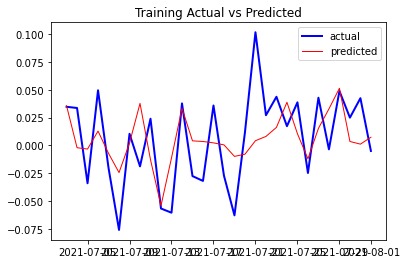

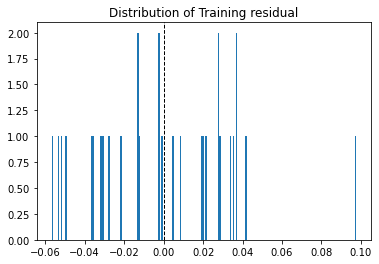

In [37]:
# graphs
model_graphs(predicted = train_predicted['Close_prices'], actual = train_actual['Close_prices'], title = 'Training')

In [38]:
# confusion matrix
train_confusion = confusion_matrix(predicted = train_predicted['Close_prices'], actual = train_actual['Close_prices'], title = 'Train')

{'true_positive': 14, 'true_negative': 7, 'false_positive': 6, 'false_negative': 3}

Metrics for [Train]
Accuracy: 0.700 
TP Rate:  0.824 
FP Rate:  0.462
TN Rate:  0.538 
FN Rate:  0.176

            [Train] Confusion Matrix

           |-------------|-------------|
  n= 30  | Predicted:  | Predicted:  |
           |    Down     |    Up       |
|----------|-------------|-------------|------------|
| Actual:  |             |             |            |
|  Down    |  tn: 7    |  fp: 6    |    13     |
|----------|-------------|-------------|------------|
| Actual:  |             |             |            |
|   UP     |  fn: 3    |  tp: 14    |    17    |
|----------|-------------|-------------|------------|
           |             |             |
           |      10    |      20   |
           |-------------|-------------|



In [39]:
# test results
# test_lag contains the last 'num_lag' number of observations of the training data in order to make the forecast for the first "real" test observation
test_lag = stationary_model.iloc[len(train) - num_lag :]
test_predicted = predict(data = test_lag, fitted_model = model_fit, lag_order = num_lag, predict_steps = 1)
test_actual = stationary_model.iloc[len(train) :]

0.043019393783595476
RMSE = 0.043019393783595476
 MAE = 0.035638505073235835


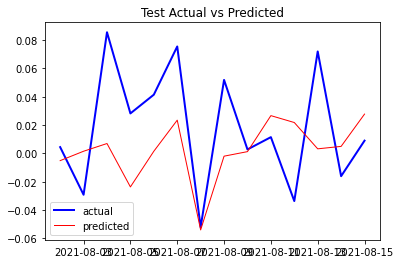

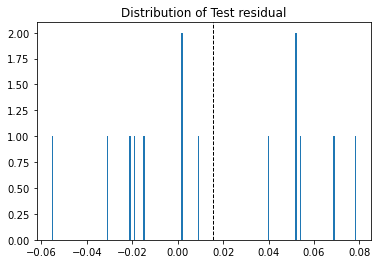

In [40]:
# graphs
model_graphs(predicted = test_predicted['Close_prices'], actual = test_actual['Close_prices'], title = 'Test')

In [41]:
# confusion matrix
test_confusion = confusion_matrix(predicted = test_predicted['Close_prices'], actual = test_actual['Close_prices'], title = 'Test')

{'true_positive': 7, 'false_negative': 3, 'false_positive': 3, 'true_negative': 1}

Metrics for [Test]
Accuracy: 0.571 
TP Rate:  0.700 
FP Rate:  0.750
TN Rate:  0.250 
FN Rate:  0.300

            [Test] Confusion Matrix

           |-------------|-------------|
  n= 14  | Predicted:  | Predicted:  |
           |    Down     |    Up       |
|----------|-------------|-------------|------------|
| Actual:  |             |             |            |
|  Down    |  tn: 1    |  fp: 3    |    4     |
|----------|-------------|-------------|------------|
| Actual:  |             |             |            |
|   UP     |  fn: 3    |  tp: 7    |    10    |
|----------|-------------|-------------|------------|
           |             |             |
           |      4    |      10   |
           |-------------|-------------|



**Model gives us 57% accuracy on test dataset and 70% on training**

Code Reference - https://github.com/pcann9/Predict_Bitcoin_Using_Reddit_Sentiment/blob/master/7_stationary_transformation.ipynb